(array([-50.,   0.,  50., 100., 150., 200., 250., 300., 350.]),
 [Text(-50.0, 0, '2024-12-29T22:48:51.292397'),
  Text(0.0, 0, '2024-12-19T08:48:51.918389'),
  Text(50.0, 0, '2024-12-21T11:48:51.819357'),
  Text(100.0, 0, '2024-12-23T13:48:51.715723'),
  Text(150.0, 0, '2024-12-25T15:48:51.643450'),
  Text(200.0, 0, '2024-12-27T18:48:51.400279'),
  Text(250.0, 0, '2024-12-29T20:48:51.312216'),
  Text(300.0, 0, '2024-12-31T22:48:52.064654'),
  Text(350.0, 0, '')])

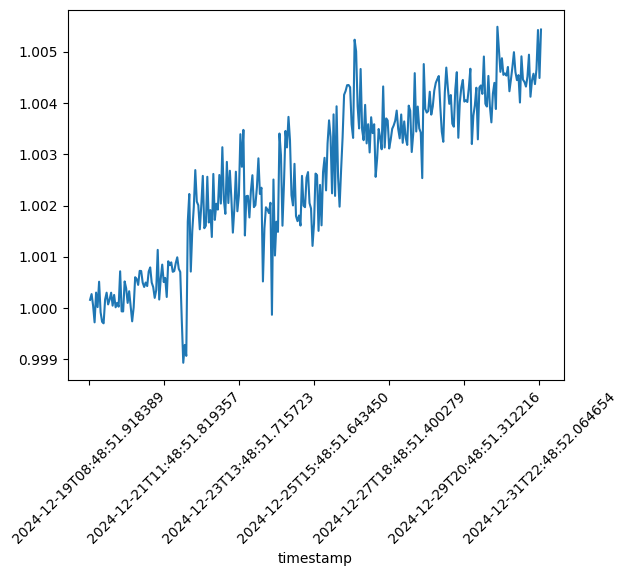

In [17]:
import json
import pandas as pd
import matplotlib.pyplot as plt

with open('./data/equity.json', 'r') as f:
	equity = json.load(f)

equity = pd.DataFrame(equity)
equity = equity[equity.account.isin(['funding_arb_short_leg', 'funding_arb_long_leg'])]
equity = equity[equity.timestamp<'2025-01-01']
price_series = equity.groupby('timestamp')['equity'].sum()
ret = price_series.pct_change()
(1+ret).cumprod().plot()
plt.xticks(rotation=45)


In [ ]:
(365/12)*0.005 # APY

0.15208333333333335

In [13]:
#!/usr/bin/env python3

import os
import datetime
import requests
import json
import sys

# Hardcoded output directory
OUTPUT_DIR = "./"  # <-- change this to your desired path


def fetch_and_save():
    """
    Fetch JSON from Yoroi market-summary API and save to a timestamped file.
    """
    url = "https://yoroi.xyz/api/market-summary"
    try:
        resp = requests.get(url, timeout=10)
        resp.raise_for_status()
    except Exception as e:
        print(f"Error fetching data from {url}: {e}", file=sys.stderr)
        sys.exit(1)

    data = resp.json()

    # build timestamped filename
	# unix timestamp in ms in UTC
    ts = int(datetime.datetime.utcnow().timestamp() * 1000)
    fname = f"market_summary_{ts}.json"
    os.makedirs(OUTPUT_DIR, exist_ok=True)
    path = os.path.join(OUTPUT_DIR, fname)

    try:
        with open(path, "w") as f:
            json.dump(data, f, indent=2)
    except Exception as e:
        print(f"Error writing file {path}: {e}", file=sys.stderr)
        sys.exit(1)

    print(f"Saved market summary → {path}")


if __name__ == "__main__":
    fetch_and_save()


JSONDecodeError: Expecting value: line 1 column 1 (char 0)